## Summary

This is a simple script that reads in FATES history files and generates geospatial plots.
Numpy, scipy, matplotlib and geopandas must all be installed.


In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import netcdf
import mpl_toolkits as mpl_tk
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap


ncfilename = 'iclm50fates-parteh-test-vf1-f45.clm2.h0.0036-12.nc'

fp = netcdf.netcdf_file(ncfilename, 'r', mmap=False)

Read in the spatial coordinates.

In [8]:
lon_dim = fp.variables['lon'].data
lat_dim = fp.variables['lat'].data

Read in multiplexed dimensions, like SCPF (size class x plant functional type).

In [9]:
pftmap_levscpf = fp.variables['fates_pftmap_levscpf'].data
scmap_levscpf  = fp.variables['fates_scmap_levscpf'].data

Read in normal dimensions

In [10]:
pft_dim = fp.variables['fates_levpft'].data
scls_dim = fp.variables['fates_levscls'].data

Load in the geospatial mapping, including a lowres coastline.

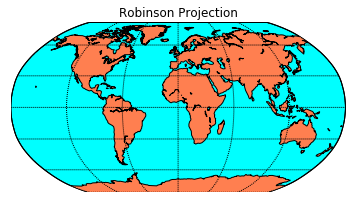

In [24]:
m = mpl_tk.basemap.Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Robinson Projection")
plt.show()